In [1]:
import requests
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [3]:
url = 'http://cloth.gay:8000/server/print-message/'
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(response)

{'message': 'Message printed'}


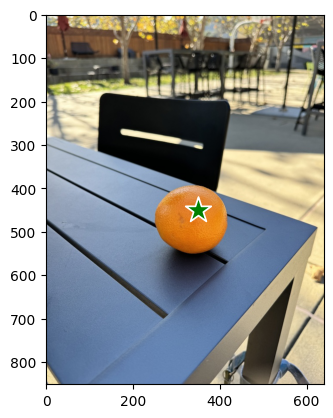

In [4]:
file_path = 'orange2.jpg'
img_client = Image.open(file_path)
input_point = np.array([[350,450]])
input_label = np.array([1])

plt.figure()
plt.imshow(img_client)

show_points(input_point, input_label, plt.gca())
plt.show()


Image mask


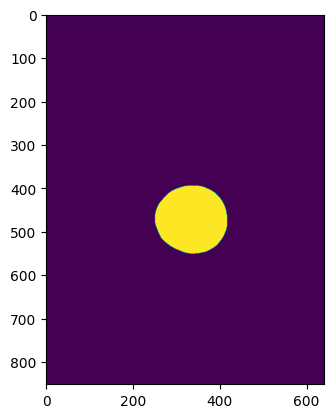

In [5]:
url = 'http://cloth.gay:8000/server/image-upload/'
file_path = 'orange2.jpg'
with open(file_path, 'rb') as file:
    data = {"points": {"pos_points": [{"x": 350, "y": 450}], "neg_points": []}}
    json_data = json.dumps(data)
    payload = {
        'image': file,
        'json': ('data.json', json_data, 'application/json')
    }
    response = requests.post(url, files=payload)
    if response.status_code == 200:
        data = response.json()
        print(data['message'])
        encoded_image = data['image_data']
        decoded_image =  base64.b64decode(encoded_image.encode('utf-8'))
        img_server = Image.open(BytesIO(decoded_image))
        plt.figure()
        plt.imshow(img_server)

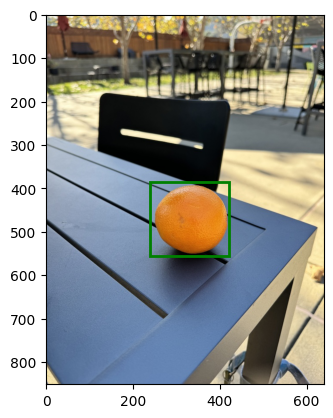

In [6]:
file_path = 'orange2.jpg'
img_client = Image.open(file_path)
# Must be top left, bottom right
input_box = np.array([240, 385, 420, 555])

plt.figure()
plt.imshow(img_client)

show_box(input_box, plt.gca())
plt.show()

Image mask


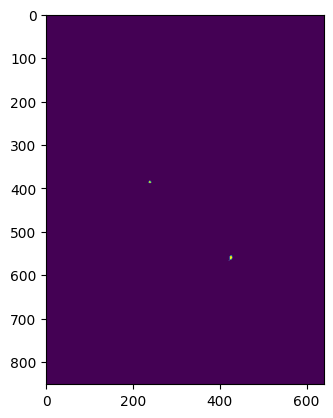

In [10]:
url = 'http://cloth.gay:8000/server/image-upload/'
file_path = 'orange2.jpg'
with open(file_path, 'rb') as file:
    data = {"box": {"point1": {"x": 240, "y": 385}, "point2": {"x": 420, "y": 555}}}
    json_data = json.dumps(data)
    payload = {
        'image': file,
        'json': ('data.json', json_data, 'application/json')
    }
    response = requests.post(url, files=payload)
    if response.status_code == 200:
        data = response.json()
        print(data['message'])
        encoded_image = data['image_data']
        decoded_image =  base64.b64decode(encoded_image.encode('utf-8'))
        img_server = Image.open(BytesIO(decoded_image))
        plt.figure()
        plt.imshow(img_server)

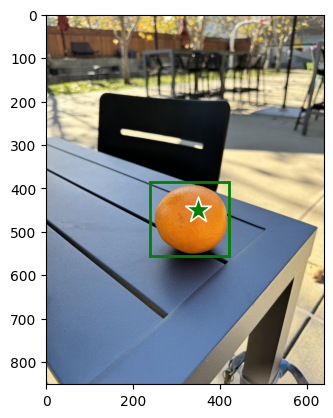

In [8]:
file_path = 'orange2.jpg'
img_client = Image.open(file_path)
input_point = np.array([[350,450]])
input_label = np.array([1])
input_box = np.array([240, 385, 420, 555])

plt.figure()
plt.imshow(img_client)

show_points(input_point, input_label, plt.gca())
show_box(input_box, plt.gca())
plt.show()


Image mask


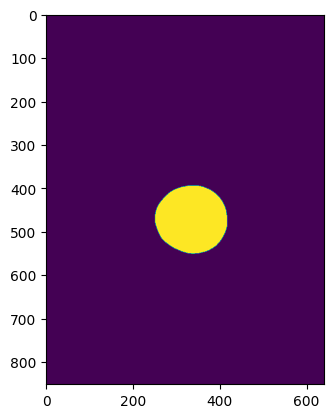

In [9]:
url = 'http://cloth.gay:8000/server/image-upload/'
file_path = 'orange2.jpg'
with open(file_path, 'rb') as file:
    data = {"points": {"pos_points": [{"x": 350, "y": 450}], "neg_points": []}, "box": {"point1": {"x": 240, "y": 385}, "point2": {"x": 420, "y": 555}}}
    json_data = json.dumps(data)
    payload = {
        'image': file,
        'json': ('data.json', json_data, 'application/json')
    }
    response = requests.post(url, files=payload)
    if response.status_code == 200:
        data = response.json()
        print(data['message'])
        encoded_image = data['image_data']
        decoded_image =  base64.b64decode(encoded_image.encode('utf-8'))
        img_server = Image.open(BytesIO(decoded_image))
        plt.figure()
        plt.imshow(img_server)